## Linear regression models with Stats

In this lecture we are going to learn:

- How to run a scatter plot of two variables to check for correlation.
- How to estimate a linear regression model with the **statsmodels** package.
- How to forecast based on a linear regression model. 
- How to use a dummy variable to capture qualitative predictors. 

As usual, the first step is to import the data by using the **pandas** package. The data refers to median house prices in a metropolitan area in the US. In addition to the target variable, median house price for a given are, we also have a set of predictors such as the portion of the house built before 1940 (**age**), number of rooms (**rm**), per capita crime rate (**crim**) and tax rate (**tax**). 

In [9]:
import pandas as pd

df = pd.read_csv('Boston.csv',index_col = 0)

Let have a quick look at the variables in the dataframe

In [10]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

We first need to check how many missing observations, if any, we do have in the dataset. 

In [11]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

## Preliminary analysis

There is no missing observation so we can start to estimate our regression. Suppose we want to forecast house prices based on the number of rooms and the age of the house. We can first have a visual impression of the correlations. Let consider **age** first. For plotting we introduce a new package that is called **seaborn**. 

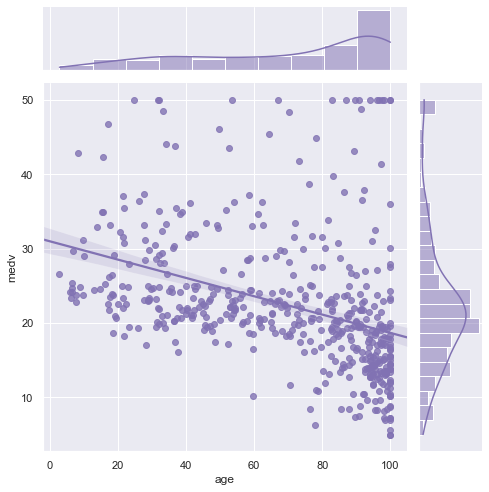

In [12]:
import seaborn as sns
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="age", y="medv", data=df,
                  kind="reg", truncate=False,
                  color="m", height=7)
#truncate=False: the regression line go beyond min&max value of observations
#truncate=True: the regression line doen't go beyond min&max value of observations

As far as **age** is concerned, it seems there is a negative correlation between how old is a house and its median market price. That is, we can think about using **age** as a predictor. 

## Estimate a linear regression 

Since we are interested in forecasting, and ultimately to assess the performance of a linear regression model out of sample, we need to split the train vs testing observations. 

In [13]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Define the predictor
X       = df[['rm','age']]
X       = sm.add_constant(X)

# Define the target variable
y       = df['medv']

# Split the whole data in train vs test data. We take a third of the data as testing sample. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Let us now estimate the linear regression model. 

In [17]:
# Define and estimate the model
model   = sm.OLS(y_train, X_train)
results = model.fit()

# Display the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     181.3
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           4.02e-54
Time:                        19:25:45   Log-Likelihood:                -1116.2
No. Observations:                 339   AIC:                             2238.
Df Residuals:                     336   BIC:                             2250.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.4108      3.569     -7.120      0.0

There is a large set of results here. Few facts emerge: 

1. There is a positive and significant relationship between **rm** and the median house price. In particular, one room more corresponds to a $8392 higher price, on average. 

2. There is a negative and significant relationship between **age** and the median house price. 

3. The sample $R^2$ stands at 0.519, that is, the linear regression model explains roughly 52\% of the variation of the data. 

When it comes to in-sample performance, the linear model seems to perform fairly well. Let know look at the out-of-sample performance based on the testin observations. 

In [18]:
import numpy as np

# Construct the predicted values
ypred = results.predict(X_test)
ss_tot = np.sum( (y_test - y_train.mean())**2 )
ss_res = np.sum( (y_test - ypred)**2 )

r2_score = (1 - ss_res/ss_tot)
print(round(r2_score,2))

0.56


The performance of the linear model is similar both in-sample and out-of-sample. For the testing set the $R^2$ is 56\%. 

## Dummy variables in linear regressions

We can consider qualitative variables as predictors. For instance, in our data we have a dummy variable **char** which tracks if the house is close to the river (= 1 if tract bounds river; 0 otherwise). 

In [19]:
# Define the predictor
X       = df[['rm','age','chas']]
X       = sm.add_constant(X)

# Define the target variable
y       = df['medv']

# Split the whole data in train vs test data. We take a third of the data as testing sample. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
# Define and estimate the model
model   = sm.OLS(y_train, X_train)
results = model.fit()

# Display the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     133.8
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           5.51e-57
Time:                        19:30:08   Log-Likelihood:                -1106.7
No. Observations:                 339   AIC:                             2221.
Df Residuals:                     335   BIC:                             2237.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.0467      3.518     -6.552      0.0

It seems that houses closer to the river, are more pricy, on average. The explanatory power though increases only marginally, that is the $R^2$ increases to 54\% from 51\%. 

## Out-of-of sample $R^2$ with a built-in function

We can now predict house prices for the testing sample and calculate the out-of-sample $R^2$

In [21]:
# Create the selection matrix to select the parameters which needs to be tested
from sklearn.metrics import mean_squared_error, r2_score

ypred   = results.predict(X_test)

# The coefficient of determination: 1 is perfect prediction
print('R^2: %.2f'
      % r2_score(y_test, ypred))

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, ypred))

R^2: 0.55
Mean squared error: 34.12
